<a href="https://colab.research.google.com/github/minii-source/CNN-project1/blob/main/First_CNN_Project_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building CNN- Convolution Neural Network

###Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)
 
###Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

#Import Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [26]:
import tensorflow as tf

In [27]:
from tensorflow import keras

In [28]:
fashion_mnist = keras.datasets.fashion_mnist

#load data

In [29]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [30]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [31]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [33]:
y_train[0]

9

In [34]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

#Show image

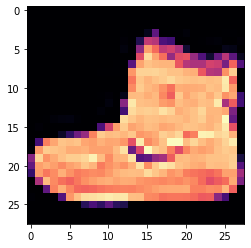

In [35]:
plt.imshow(X_train[0], cmap='magma')


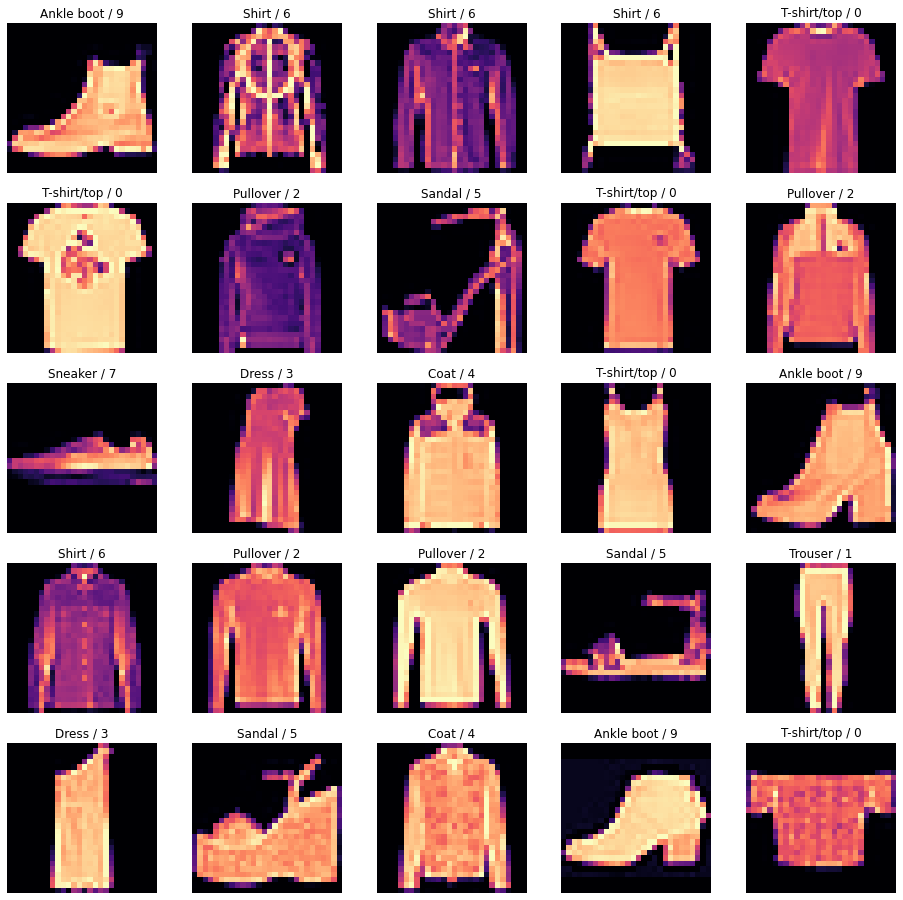

In [36]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="magma")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
 

## Change Dimention

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_train.ndim

3

In [39]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

## Feature Scaling

In [40]:
X_train = X_train/255
X_test = X_test/255

## Split Dataset

In [41]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [42]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape


((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

#Build First Convolutional Neural Network

In [44]:
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [45]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [46]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [47]:
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))


Epoch 1/10
94/94 [==============================] - 1s 10ms/step - loss: 0.6401 - accuracy: 0.7872 - val_loss: 0.4593 - val_accuracy: 0.8413
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3870 - accuracy: 0.8639 - val_loss: 0.3694 - val_accuracy: 0.8742
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3382 - accuracy: 0.8818 - val_loss: 0.3457 - val_accuracy: 0.8790
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3076 - accuracy: 0.8921 - val_loss: 0.3200 - val_accuracy: 0.8870
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2888 - accuracy: 0.8979 - val_loss: 0.3113 - val_accuracy: 0.8910
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2722 - accuracy: 0.9025 - val_loss: 0.2979 - val_accuracy: 0.8966
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2583 - accuracy: 0.9073 - val_loss: 0.3002 - val_accuracy: 0.8950
Epoch 8/10
94/94 [=

#Test and Evaluate Model

In [48]:
cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [57]:
np.argmax(cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9

In [58]:
y_test[0]

9

In [60]:
y_pred=cnn_model.predict(X_test).round(2)

In [61]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.95, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.05, 0.  ]], dtype=float32)

In [62]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.8947


[0.29098668694496155, 0.8946999907493591]

# Visualize output

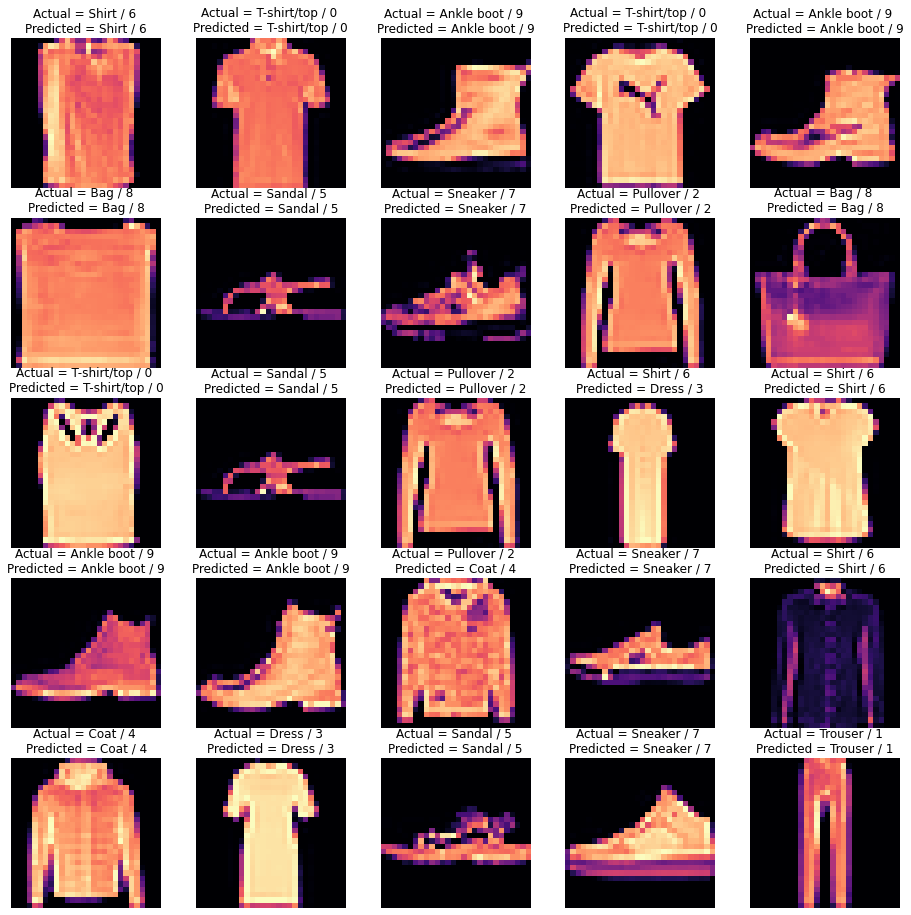

In [64]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'magma')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

#Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

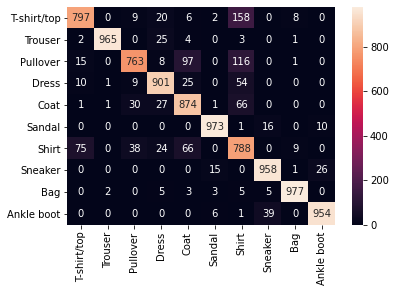

In [66]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [67]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.80      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.90      0.76      0.83      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.87      0.84      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.66      0.79      0.72      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



#Save Model

In [68]:
cnn_model.save('fashion_mnist_cnn_model.h5')

# Load model

In [69]:
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [71]:
fashion_mnist_cnn_model.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.95, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.05, 0.  ]], dtype=float32)

In [70]:
Y_pred_sample=fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [72]:
np.argmax(Y_pred_sample[0])

9